In [2]:
import torch
import matplotlib.pyplot as plt
import cv2
import numpy as np
from pydicom import dcmread
import os

In [3]:
x = torch.load(r'Tensors\train\20586908_6c613a14b80a8591_MG_R_CC_ANON.pt')
imagen = x['image']
imagen.unsqueeze(0).shape

torch.Size([1, 1024, 1024])

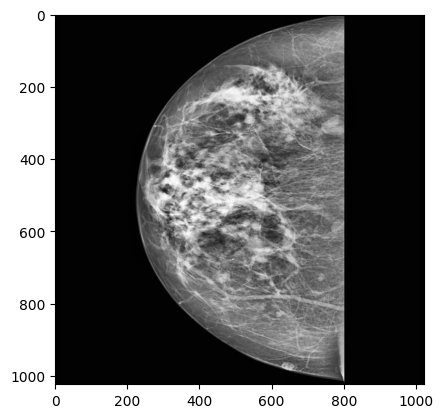

In [4]:
plt.imshow(imagen, cmap ='gray')

In [35]:
path_imagen = r'In_Breast_2012\AllDICOMs\50997461_97ec8cadfca70d32_MG_R_ML_ANON.dcm'

ds = dcmread(path_imagen)

In [72]:
imagen = dcmread(path_imagen).pixel_array
flip = False
if os.path.basename(path_imagen).split('_')[3] == 'R':
    imagen = cv2.flip(imagen,1)
    flip = True
_,img_bin = cv2.threshold(imagen, 0.0,255.0,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cnts,hierarchy = cv2.findContours(img_bin.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contours = cv2.drawContours(img_bin, cnts, -1, 127, 12)


print(len(cnts))
print(hierarchy)

x,y,w,h = cv2.boundingRect(cnts[len(cnts)-1])

print(imagen.shape)

print(f'x: {x}')
print(f'y: {y}')
print(f'w: {w}')
print(f'h: {h}')

roi_img = imagen[y:y+h+1, x:x+w+1]

print(roi_img.shape)

if flip:
    roi_img = cv2.flip(roi_img,1)
    imagen = cv2.flip(imagen,1)
    flip = False


11
[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 7  5 -1 -1]
  [ 8  6 -1 -1]
  [ 9  7 -1 -1]
  [10  8 -1 -1]
  [-1  9 -1 -1]]]
(4084, 3328)
x: 0
y: 6
w: 2123
h: 3742
(3743, 2124)


Text(0.5, 1.0, '(4084, 3328)')

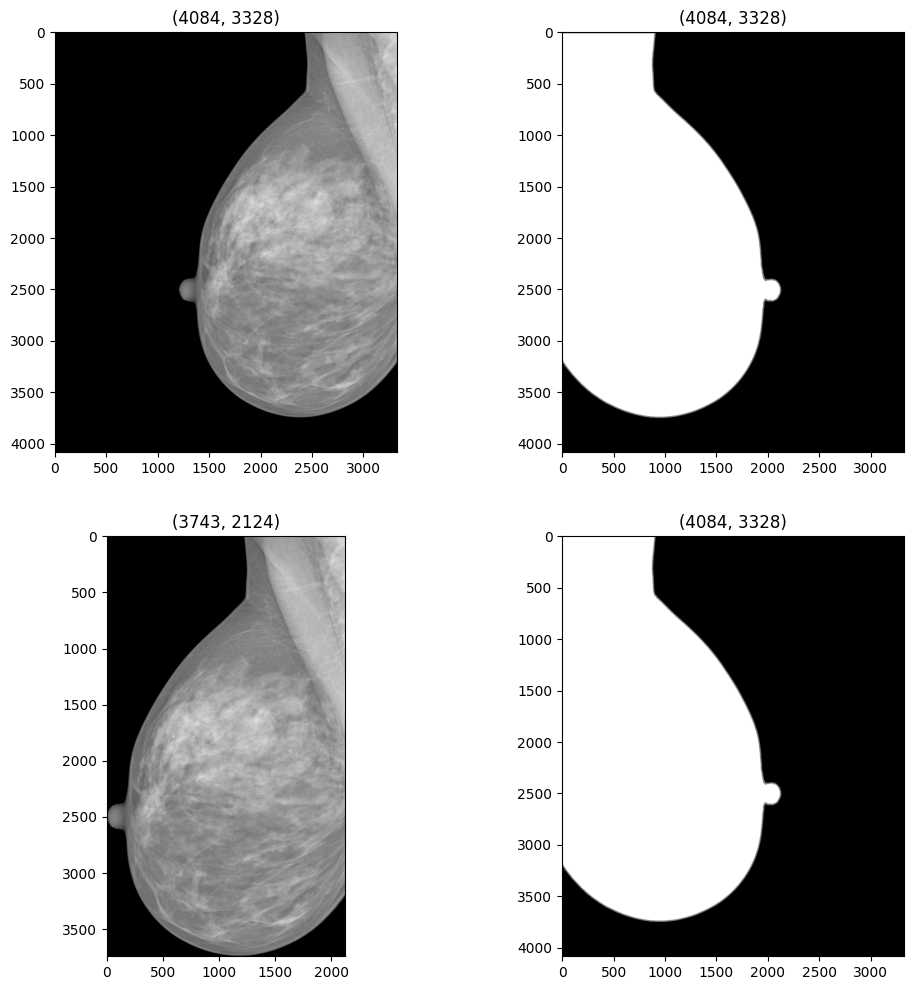

In [73]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.imshow(imagen, cmap='gray')
plt.title(f'{imagen.shape}')
plt.subplot(2,2,2)
plt.imshow(img_bin, cmap='gray')
plt.title(f'{img_bin.shape}')
plt.subplot(2,2,3)
plt.imshow(roi_img, cmap='gray')
plt.title(f'{roi_img.shape}')
plt.subplot(2,2,4)
plt.imshow(contours, cmap='gray')
plt.title(f'{contours.shape}')

In [68]:
import pandas as pd

mass_dir = r'In_Breast_2012\Mass_Masks'
metadata_dir = r'In_Breast_2012\INbreast.csv'
masa = os.listdir(mass_dir)



'2'